### Problem: From the given iris dataset predict the optimum number of clusters and represent it visually

#### By Indrajith V

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings as wg
wg.filterwarnings('ignore')

In [17]:
df = pd.read_csv('iris_task2.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
df.shape

(150, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
iris = pd.DataFrame(df)
iris_df = iris.drop(columns= ['Species' ,'Id'] )
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##### For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster.The K value corresponding to this point is the optimal K value or an optimal number of clusters

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters = i)
    km = km.fit(iris_df)
    wcss.append(km.inertia_)

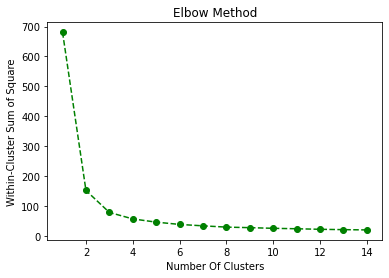

In [25]:
plt.plot(range(1,15),wcss,'go--',color='green')
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.show()

###### The goal of the K-means clustering algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of the K groups based on the features that are provided.

####  outputs of executing a K-means on a dataset are:

##### ● K centroids: Centroids for each of the K clusters identified from the dataset.

##### ● Labels for the training data: Complete dataset labelled to ensure each data point is assigned to one of the clusters.

In [26]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init = 10,random_state = 0)
predictions = kmeans.fit_predict(iris_df)

### Visualisation Of Clusters

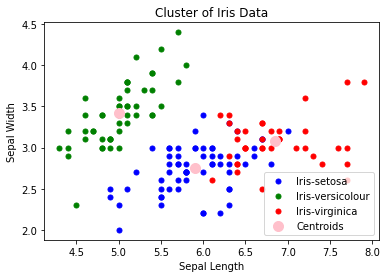

In [27]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'red', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'pink', label = 'Centroids')

plt.title('Cluster of Iris Data')
plt.xlabel('Sepal Length',)
plt.ylabel('Sepal Width')              
plt.legend()
